# **CITRA SATELIT LANDSAT**

Program Landsat adalah serangkaian misi satelit pengamat Bumi yang dikelola ber-
sama oleh The National Aeronautics and Space Administration (NASA) dan United
States Geological Survey (USGS). Hingga saat ini, telah diluncurkan sembilan sa-
telit ke luar angkasa, tetapi hanya dua yang masih beroperasi, yaitu Landsat 8 dan
Landsat 9. Landsat 9 merupakan satelit terbaru dalam rangkaian misi Landsat
yang diluncurkan pada tahun 2021 untuk melanjutkan pengamatan Bumi secara
konsisten dan berkelanjutan.
Satelit ini membawa dua sensor utama, yaitu Operational Land Imager-2 (OLI-
2) dan Thermal Infrared Sensor-2 (TIRS-2). Dibandingkan dengan pendahulunya,
OLI-1 pada Landsat 8, OLI-2 memiliki peningkatan pada akurasi radiometrik dari
12 menjadi 14 bit, serta rasio sinyal terhadap noise yang lebih baik. Hal ini me-
mungkinkan Landsat 9 mendeteksi perbedaan yang lebih halus, khususnya di area
gelap seperti perairan atau hutan lebat.

Pengenalan Direktori Data Landsat GEE:
"LANDSAT/LC09/C02/T1_TOA"


*   Landsat: Nama citra satelit yang akan diakses data citra satelitnya
*   LC09: Menggunakan data citra landsat 9 (LC08, untuk Landsat 8)
*   C02: Collection versi 2 (C01, Collection versi 1)
*   T1_... : Tier 1, Akurasi Geometrik sangat tinggi (T2, lebih buruk dari T1)
*   ..._TOA : TOA, Pantulan cahaya yang belum dikreksi atmosfer (L2, sudah dikoreksi atmosfer)


Untuk Riset:

*  Untuk Praktis dan Sederhana: TOA

*  Butuh resource banyak, tapi akurat : SR

# Citra Komposit

Sebelum menampilkan sebuah citra satelit, diperlukan 3 kombinasi band menampilkannya menjadi sebuah citraa komposit, umpamanya  mirip seperti RGB disebuah gambar. Kombinasi band juga menampilkan citra dalam berbagai bentuk dan tujuan, beberapa diantaranya seperti Natural Color (kombinasi B4,B3,B2) yang menampilkan citra satelit seperti mata manusia dan ada juga False Color (kombinasi B7,B5,B4) yang biasanya ditampilkan dalam proses analisis area terbakar. Dan selain itu masih banyak lagi lainnya. Berikut table deskripsi dari band di citra landsat

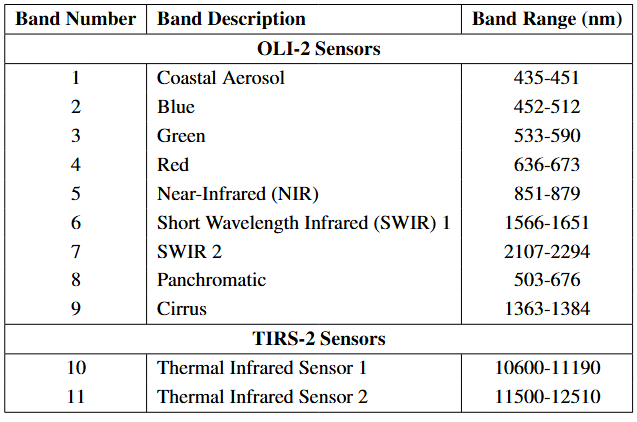

# **Disclaimer**
**Untuk mengakses data citra dari GEE melalui python, terlebih dahulu diharapkan sudah memiliki akun project Earth Engine  melalui " https://code.earthengine.google.com/register " dan pastikan pilih unpaid usage, agar gratis**

# **Koleksi Citra Landsat 9: "LANDSAT/LC09/C02/T1_TOA"**

Koleksi Citra Landsat 9: "LANDSAT/LC09/C02/T1_TOA"

Koreksi Geomtrik & Radiometrik sudah dilakukan, namun untuk **koreksi atmosferik dan cloud masking** belom dilakukan (sehingga perlu dilakukan)

In [ ]:
# ===============================
# STEP 1: Install library (Colab)
# ===============================
!pip install earthengine-api
!pip install geemap

## Natural Color

In [1]:
# ============================
# STEP 2: Import & Authenticate
# ============================
import ee
import geemap
import time

# Autentikasi dan inisialisasi Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-bigdata121450146')  #nama project bisa dicek di 'code.earthengine.google.com', pastikan sudah diregister

# ============================
# STEP 3: Data Preparation
# ============================

# 1. Load batas administratif Sumatera Selatan (GAUL 2015)
sumsel = ee.FeatureCollection("FAO/GAUL/2015/level1") \
            .filter(ee.Filter.eq("ADM1_NAME", "Sumatera Selatan"))

# 2. Load citra Landsat 9 TOA Reflectance
landsat9_toa = ee.ImageCollection("LANDSAT/LC09/C02/T1_TOA") \
                  .filterBounds(sumsel) \
                  .filterDate("2023-01-01", "2023-09-30") \
                  .filter(ee.Filter.lt("CLOUD_COVER", 25)) \
                  .median() \
                  .clip(sumsel)

# ============================
# STEP 4: Visualization
# ============================

# Parameter visualisasi Natural Color Composite (Red, Green, Blue)
vis_params_natural_color = {
    'bands': ["B4", "B3", "B2"],  # Red, Green, Blue
    'min': 0,
    'max': 0.4,  # Sesuaikan untuk pantulan TOA, umumnya 0.3-0.5
    'gamma': 1.2  # Untuk meningkatkan kontras
}

# Inisialisasi peta interaktif
Map = geemap.Map()
Map.centerObject(sumsel, 7)

# Tambahkan layer Landsat 9 TOA Natural Color
Map.addLayer(landsat9_toa, vis_params_natural_color, "Landsat 9 TOA (Natural Color) - 2023")

# Tambahkan layer batas administratif Sumatera Selatan
sumsel_style = {
    'color': 'red',
    'width': 2,
    'fillColor': '00000000'  # Transparan
}
styled_sumsel = sumsel.style(**sumsel_style)
Map.addLayer(styled_sumsel, {}, "Sumatera Selatan Boundary")

# Tampilkan peta interaktif di Colab
Map


Map(center=[-3.2210694545062024, 104.16355582426586], controls=(WidgetControl(options=['position', 'transparen…

# False Color

In [2]:
# ============================
# STEP 2: Import & Authenticate
# ============================
import ee
import geemap
import time

# Autentikasi dan inisialisasi Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-bigdata121450146')

# ============================
# STEP 3: Data Preparation
# ============================

# 1. Load batas administratif Sumatera Selatan (GAUL 2015)
sumsel = ee.FeatureCollection("FAO/GAUL/2015/level1") \
            .filter(ee.Filter.eq("ADM1_NAME", "Sumatera Selatan"))

# 2. Load citra Landsat 9 TOA Reflectance
landsat9_toa = ee.ImageCollection("LANDSAT/LC09/C02/T1_TOA") \
                  .filterBounds(sumsel) \
                  .filterDate("2023-01-01", "2023-09-30") \
                  .filter(ee.Filter.lt("CLOUD_COVER", 25)) \
                  .median() \
                  .clip(sumsel)

# ============================
# STEP 4: Visualization
# ============================

# Parameter visualisasi False Color Composite (SWIR2, NIR, Red)
vis_params_false_color = {
    'bands': ["B7", "B6", "B4"],
    'min': 0,
    'max': 0.5,  # Bisa disesuaikan tergantung pantulan TOA, umumnya 0.3-0.5
    'gamma': 1.2
}

# Inisialisasi peta interaktif
Map = geemap.Map()
Map.centerObject(sumsel, 7)

# Tambahkan layer Landsat 9 TOA False Color
Map.addLayer(landsat9_toa, vis_params_false_color, "Landsat 9 TOA (False Color) - 2023")

# Tambahkan layer batas administratif Sumatera Selatan
sumsel_style = {
    'color': 'red',
    'width': 2,
    'fillColor': '00000000'  # Transparan
}
styled_sumsel = sumsel.style(**sumsel_style)
Map.addLayer(styled_sumsel, {}, "Sumatera Selatan Boundary")

# Tampilkan peta interaktif di Colab
Map


Map(center=[-3.2210694545062024, 104.16355582426586], controls=(WidgetControl(options=['position', 'transparen…

# **Koleksi Citra Landsat 9: "LANDSAT/LC09/C02/T1_L2"**

## Natural Color

In [3]:
# ============================
# STEP 2: Import & Authenticate
# ============================
import ee
import geemap
import time

# Autentikasi dan inisialisasi Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-bigdata121450146')

# ============================
# STEP 3: Data Preparation
# ============================

# 1. Load batas administratif Sumatera Selatan (GAUL 2015)
sumsel = ee.FeatureCollection("FAO/GAUL/2015/level1") \
            .filter(ee.Filter.eq("ADM1_NAME", "Sumatera Selatan"))

# 2. Load citra Landsat 9 Surface Reflectance (SR)
landsat9_sr = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2") \
                .filterBounds(sumsel) \
                .filterDate("2023-01-01", "2023-09-30") \
                .filter(ee.Filter.lt("CLOUD_COVER", 25)) \
                .median() \
                .clip(sumsel)

# 3. Konversi ke reflektansi topan (scale factor SR → nilai 0 - 1)
# Landsat SR scale factor = 0.0000275, offset = -0.2
landsat9_sr_scaled = landsat9_sr.select(['SR_B2', 'SR_B3', 'SR_B4']) \
                      .multiply(0.0000275).add(-0.2)

# ============================
# STEP 4: Visualization
# ============================

# Parameter visualisasi Natural Color (RGB)
vis_params_natural = {
    'bands': ["SR_B4", "SR_B3", "SR_B2"],  # Red, Green, Blue (Natural Color)
    'min': 0,
    'max': 0.3,     # Disesuaikan untuk SR (nilai reflektansi 0-1)
    'gamma': 1.2    # Untuk memperbaiki kontras
}

# Inisialisasi peta interaktif
Map = geemap.Map()
Map.centerObject(sumsel, 7)

# Tambahkan layer Landsat 9 SR Natural Color
Map.addLayer(landsat9_sr_scaled, vis_params_natural, "Landsat 9 SR (Natural Color) - 2023")

# Tambahkan layer batas administratif Sumatera Selatan
sumsel_style = {
    'color': 'red',
    'width': 2,
    'fillColor': '00000000'  # Transparan
}
styled_sumsel = sumsel.style(**sumsel_style)
Map.addLayer(styled_sumsel, {}, "Sumatera Selatan Boundary")

# Tampilkan peta interaktif di Colab
Map


Map(center=[-3.2210694545062024, 104.16355582426586], controls=(WidgetControl(options=['position', 'transparen…

## False Color

In [4]:
# ============================
# STEP 2: Import & Authenticate
# ============================
import ee
import geemap
import time

# Autentikasi dan inisialisasi Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-bigdata121450146')

# ============================
# STEP 3: Data Preparation
# ============================

# 1. Load batas administratif Sumatera Selatan (GAUL 2015)
sumsel = ee.FeatureCollection("FAO/GAUL/2015/level1") \
            .filter(ee.Filter.eq("ADM1_NAME", "Sumatera Selatan"))

# 2. Load citra Landsat 9 Surface Reflectance (SR)
landsat9_sr = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2") \
                .filterBounds(sumsel) \
                .filterDate("2023-01-01", "2023-09-30") \
                .filter(ee.Filter.lt("CLOUD_COVER", 25)) \
                .median() \
                .clip(sumsel)

# 3. Konversi ke reflektansi topan (scale factor SR → nilai 0 - 1)
# Landsat SR scale factor = 0.0000275, offset = -0.2
landsat9_sr_scaled = landsat9_sr.select(['SR_B4', 'SR_B6', 'SR_B7']) \
                      .multiply(0.0000275).add(-0.2)

# ============================
# STEP 4: Visualization
# ============================

# Parameter visualisasi False Color Composite (SWIR2, NIR, Red)
vis_params_false_color = {
    'bands': ["SR_B7", "SR_B6", "SR_B4"],  # SWIR2 → Red, NIR → Green, Red → Blue
    'min': 0,
    'max': 0.3,     # Disesuaikan skala reflektansi SR
    'gamma': 1.2    # Untuk meningkatkan kontras
}

# Inisialisasi peta interaktif
Map = geemap.Map()
Map.centerObject(sumsel, 7)

# Tambahkan layer Landsat 9 SR False Color Composite
Map.addLayer(landsat9_sr_scaled, vis_params_false_color, "Landsat 9 SR (False Color) - 2023")

# Tambahkan layer batas administratif Sumatera Selatan
sumsel_style = {
    'color': 'red',
    'width': 2,
    'fillColor': '00000000'  # Transparan
}
styled_sumsel = sumsel.style(**sumsel_style)
Map.addLayer(styled_sumsel, {}, "Sumatera Selatan Boundary")

# Tampilkan peta interaktif di Colab
Map


Map(center=[-3.2210694545062024, 104.16355582426586], controls=(WidgetControl(options=['position', 'transparen…

# Indeks Vegetasi

Indeks Vegetasi adalah sebuah indikator yang digunakan untuk mengukur kondisi dan keberadaan vegetasi di suatu wilayah, terutama dalam analisis citra satelit. Indeks ini membantu untuk memantau dan menganalisis kesehatan tanaman, tingkat kelembaban tanah, serta mendeteksi perubahan vegetasi dari waktu ke waktu. Indeks Vegetasi umumnya diukur dengan menggunakan kombinasi data dari berbagai band spektral yang tersedia pada citra satelit multispektral (seperti Landsat, Sentinel-2, dll)


Indeks Vegetasi itu banyak sekali ada NDVI,NBR,dNBR,LSWI,OSI, dan lainnya....

## NDVI


In [5]:
# ============================
# STEP 2: Import & Authenticate
# ============================
import ee
import geemap
import time

# Autentikasi dan inisialisasi Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-bigdata121450146')

# ============================
# STEP 3: Data Preparation
# ============================

# 1. Load batas administratif Sumatera Selatan (GAUL 2015)
sumsel = ee.FeatureCollection("FAO/GAUL/2015/level1") \
            .filter(ee.Filter.eq("ADM1_NAME", "Sumatera Selatan"))

# 2. Load citra Landsat 9 Surface Reflectance (SR)
landsat9_sr = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2") \
                .filterBounds(sumsel) \
                .filterDate("2023-01-01", "2023-09-30") \
                .filter(ee.Filter.lt("CLOUD_COVER", 25)) \
                .median() \
                .clip(sumsel)

# 3. Konversi ke reflektansi topan (scale factor SR → nilai 0 - 1)
landsat9_sr_scaled = landsat9_sr.select(['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7']) \
                      .multiply(0.0000275).add(-0.2)

# ============================
# STEP 4: Hitung Indeks NDVI
# ============================

# Band untuk NDVI: NIR (SR_B5) dan Red (SR_B4)
nir = landsat9_sr_scaled.select('SR_B5')
red = landsat9_sr_scaled.select('SR_B4')

# Rumus NDVI = (NIR - Red) / (NIR + Red)
ndvi = nir.subtract(red).divide(nir.add(red)).rename('NDVI')

# ============================
# STEP 5: Visualization
# ============================

# Parameter visualisasi Natural Color (RGB)
vis_params_natural = {
    'bands': ["SR_B4", "SR_B3", "SR_B2"],  # Red, Green, Blue (Natural Color)
    'min': 0,
    'max': 0.3,
    'gamma': 1.2
}

# Parameter visualisasi NDVI
vis_params_ndvi = {
    'min': -1,
    'max': 1,
    'palette': [
        '#8B0000',  # Dark Red (Vegetasi tidak sehat / tidak ada)
        '#FF0000',  # Red
        '#FFA500',  # Orange
        '#FFFF00',  # Yellow
        '#ADFF2F',  # Green Yellow
        '#008000'   # Green (Vegetasi sehat)
    ]
}

# ============================
# STEP 6: Peta Interaktif
# ============================

Map = geemap.Map()
Map.centerObject(sumsel, 7)

# Tambahkan layer Landsat 9 SR Natural Color
Map.addLayer(landsat9_sr_scaled, vis_params_natural, "Landsat 9 SR (Natural Color) - 2023")

# Tambahkan layer NDVI
Map.addLayer(ndvi, vis_params_ndvi, "Normalized Difference Vegetation Index (NDVI) - 2023")

# Tambahkan layer batas administratif Sumatera Selatan
sumsel_style = {
    'color': 'red',
    'width': 2,
    'fillColor': '00000000'  # Transparan
}
styled_sumsel = sumsel.style(**sumsel_style)
Map.addLayer(styled_sumsel, {}, "Sumatera Selatan Boundary")

# Tampilkan peta interaktif di Colab
Map


Map(center=[-3.2210694545062024, 104.16355582426586], controls=(WidgetControl(options=['position', 'transparen…

## NBR

In [6]:
# ============================
# STEP 2: Import & Authenticate
# ============================
import ee
import geemap
import time

# Autentikasi dan inisialisasi Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-bigdata121450146')

# ============================
# STEP 3: Data Preparation
# ============================

# 1. Load batas administratif Sumatera Selatan (GAUL 2015)
sumsel = ee.FeatureCollection("FAO/GAUL/2015/level1") \
            .filter(ee.Filter.eq("ADM1_NAME", "Sumatera Selatan"))

# 2. Load citra Landsat 9 Surface Reflectance (SR)
landsat9_sr = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2") \
                .filterBounds(sumsel) \
                .filterDate("2023-01-01", "2023-09-30") \
                .filter(ee.Filter.lt("CLOUD_COVER", 25)) \
                .median() \
                .clip(sumsel)

# 3. Konversi ke reflektansi topan (scale factor SR → nilai 0 - 1)
# Landsat SR scale factor = 0.0000275, offset = -0.2
landsat9_sr_scaled = landsat9_sr.select(['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7']) \
                      .multiply(0.0000275).add(-0.2)

# ============================
# STEP 4: Hitung Indeks NBR
# ============================

# Band untuk NBR: NIR (SR_B5) dan SWIR2 (SR_B7)
nir = landsat9_sr_scaled.select('SR_B5')
swir2 = landsat9_sr_scaled.select('SR_B7')

# Rumus NBR = (NIR - SWIR2) / (NIR + SWIR2)
nbr = nir.subtract(swir2).divide(nir.add(swir2)).rename('NBR')

# ============================
# STEP 5: Visualization
# ============================

# Parameter visualisasi Natural Color (RGB)
vis_params_natural = {
    'bands': ["SR_B4", "SR_B3", "SR_B2"],  # Red, Green, Blue (Natural Color)
    'min': 0,
    'max': 0.3,
    'gamma': 1.2
}

# Parameter visualisasi NBR
vis_params_nbr = {
    'min': -1,
    'max': 1,
    'palette': [ 'red', 'darkred', 'black'] # Skema warna, bebas modif
}

# Inisialisasi peta interaktif
Map = geemap.Map()
Map.centerObject(sumsel, 7)

# Tambahkan layer Landsat 9 SR Natural Color
Map.addLayer(landsat9_sr_scaled, vis_params_natural, "Landsat 9 SR (Natural Color) - 2023")

# Tambahkan layer NBR
Map.addLayer(nbr, vis_params_nbr, "Normalized Burn Ratio (NBR) - 2023")

# Tambahkan layer batas administratif Sumatera Selatan
sumsel_style = {
    'color': 'red',
    'width': 2,
    'fillColor': '00000000'  # Transparan
}
styled_sumsel = sumsel.style(**sumsel_style)
Map.addLayer(styled_sumsel, {}, "Sumatera Selatan Boundary")

# Tampilkan peta interaktif di Colab
Map


Map(center=[-3.2210694545062024, 104.16355582426586], controls=(WidgetControl(options=['position', 'transparen…

## dNBR

In [7]:
# ============================
# STEP 2: Import & Authenticate
# ============================
import ee
import geemap
import time

# Autentikasi dan inisialisasi Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-bigdata121450146')

# ============================
# STEP 3: Data Preparation
# ============================

# 1. Load batas administratif Sumatera Selatan
sumsel = ee.FeatureCollection("FAO/GAUL/2015/level1") \
            .filter(ee.Filter.eq("ADM1_NAME", "Sumatera Selatan"))

# 2. Load citra Landsat 9 SR untuk pre-fire dan post-fire
# Sesuaikan tanggal pre dan post sesuai kasus kebakaran yang kamu analisis!
pre_fire = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2") \
                .filterBounds(sumsel) \
                .filterDate("2022-01-01", "2022-12-31") \
                .filter(ee.Filter.lt("CLOUD_COVER", 25)) \
                .median() \
                .clip(sumsel)

post_fire = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2") \
                .filterBounds(sumsel) \
                .filterDate("2023-01-01", "2023-09-30") \
                .filter(ee.Filter.lt("CLOUD_COVER", 25)) \
                .median() \
                .clip(sumsel)

# 3. Konversi ke reflektansi topan (scale factor SR → nilai 0 - 1)
def scale_sr(image):
    return image.select(['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7']) \
                .multiply(0.0000275).add(-0.2)

pre_fire_scaled = scale_sr(pre_fire)
post_fire_scaled = scale_sr(post_fire)

# ============================
# STEP 4: Hitung NBR & dNBR
# ============================

def calculate_nbr(image):
    nir = image.select('SR_B5')
    swir2 = image.select('SR_B7')
    return nir.subtract(swir2).divide(nir.add(swir2)).rename('NBR')

nbr_pre = calculate_nbr(pre_fire_scaled)
nbr_post = calculate_nbr(post_fire_scaled)

# Hitung dNBR = NBR pre-fire - NBR post-fire
dnbr = nbr_pre.subtract(nbr_post).rename('dNBR')

# ============================
# STEP 5: Visualization
# ============================

# Natural Color Pre-Fire
vis_params_natural = {
    'bands': ["SR_B4", "SR_B3", "SR_B2"],
    'min': 0,
    'max': 0.3,
    'gamma': 1.2
}

# Visualisasi dNBR merah → hitam
vis_params_dnbr = {
    'min': 0,
    'max': 1,
    'palette': ['#ff0000', '#800000', '#000000']  # Merah terang -> Merah tua -> Hitam
}

# ============================
# STEP 6: Peta Interaktif
# ============================

Map = geemap.Map()
Map.centerObject(sumsel, 7)

# Layer Natural Color Pre-Fire
Map.addLayer(pre_fire_scaled, vis_params_natural, "Pre-Fire (Natural Color) - 2022")

# Layer Natural Color Post-Fire
Map.addLayer(post_fire_scaled, vis_params_natural, "Post-Fire (Natural Color) - 2023")

# Layer dNBR
Map.addLayer(dnbr, vis_params_dnbr, "dNBR (Pre-Post Fire Difference)")

# Layer batas administratif Sumatera Selatan
sumsel_style = {
    'color': 'red',
    'width': 2,
    'fillColor': '00000000'
}
styled_sumsel = sumsel.style(**sumsel_style)
Map.addLayer(styled_sumsel, {}, "Sumatera Selatan Boundary")

# Tampilkan peta
Map


Map(center=[-3.2210694545062024, 104.16355582426586], controls=(WidgetControl(options=['position', 'transparen…